# Optimal high frequency trading with limit and market orders

In [73]:
# Importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting default parameters
plt.rcParams["figure.figsize"] = [12, 5] # Figure sizes for Matplotlib 

# Silencing all warnings for a better UX
warnings.filterwarnings("ignore")

In [4]:
DATA_FOLDER = "data/tickhistory_sample"

In [3]:
!ls data/tickhistory_sample/

GOOG_Quote_2022_01_03.txt        MSFT_Trade_2022_01_03.txt
GOOG_Trade_2022_01_03.txt        file_format_details.txt
MSFT_Quote_2022_01_03.txt        tick_history_ticker_coverage.txt


## Imports

In [45]:
TICKER = "MSFT"

In [46]:
# Importing trades dataset
trades = pd.read_csv(filepath_or_buffer=f"{DATA_FOLDER}/{TICKER}_Trade_2022_01_03.txt", 
            names=["timestamp", "price", "volume", "exchange_code", "trade_conditions"], 
            index_col="timestamp", 
            na_values=np.NaN
           )
trades.head()

,price,volume,exchange_code,trade_conditions
timestamp,,,,
2022-01-03 04:00:00.131933,337.0,5,7,E-B
2022-01-03 04:00:00.133034,337.0,73,7,E-B
2022-01-03 04:00:00.134199,337.0,6,7,E-B
2022-01-03 04:00:00.134415,337.5,2,7,E-B
2022-01-03 04:00:00.134422,338.0,10,7,E-B


In [47]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373674 entries, 2022-01-03 04:00:00.131933 to 2022-01-03 19:59:44.780958
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   price             373674 non-null  float64
 1   volume            373674 non-null  int64  
 2   exchange_code     373674 non-null  int64  
 3   trade_conditions  319681 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.3+ MB


**Structure**:
- **`timestamp`**
- **`price`**
- **`volume`**
- **`exchange_code`**
- **`trade_conditions`**

In [48]:
# Importing quotes dataset
quotes = pd.read_csv(filepath_or_buffer=f"{DATA_FOLDER}/{TICKER}_Quote_2022_01_03.txt", 
            names=["timestamp", "bp", "bq", "be", "ap", "aq", "ae"], 
            index_col="timestamp", 
            na_values=np.NaN
           )
quotes.head()

,bp,bq,be,ap,aq,ae
timestamp,,,,,,
2022-01-03 04:00:00.131,337.00,100,7,338.23,100,8
2022-01-03 04:00:00.133,336.51,100,8,338.23,100,8
2022-01-03 04:00:00.134,338.00,700,7,338.23,100,8
2022-01-03 04:00:00.135,338.00,500,7,338.23,100,8
2022-01-03 04:00:00.174,338.00,500,7,338.00,300,8


In [49]:
quotes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353821 entries, 2022-01-03 04:00:00.131 to 2022-01-03 19:54:56.091
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   bp      353821 non-null  float64
 1   bq      353821 non-null  int64  
 2   be      353821 non-null  int64  
 3   ap      353821 non-null  float64
 4   aq      353821 non-null  int64  
 5   ae      353821 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 18.9+ MB


**Structure**:
- **`timestamp`**
- **`bp`**: best bid price $\leadsto b(t)$
- **`bq`**: best bid volume (quantity/size)
- **`be`**: best bid exchange code
- **`ap`**: best ask price $\leadsto a(t)$
- **`aq`**: best ask volume (quantity/size)
- **`ae`**: best ask exchange code

In [50]:
# Selection of most relevant columns to "reconstruct" the LOB
L1_COLUMNS = ["bq", "bp", "aq", "ap"]

In [51]:
quotes[L1_COLUMNS].head()

,bq,bp,aq,ap
timestamp,,,,
2022-01-03 04:00:00.131,100,337.00,100,338.23
2022-01-03 04:00:00.133,100,336.51,100,338.23
2022-01-03 04:00:00.134,700,338.00,100,338.23
2022-01-03 04:00:00.135,500,338.00,100,338.23
2022-01-03 04:00:00.174,500,338.00,300,338.00


## Computations

In [52]:
data = quotes[L1_COLUMNS]

In [53]:
mid_price = (1/2)*(data["bp"] + data["ap"])

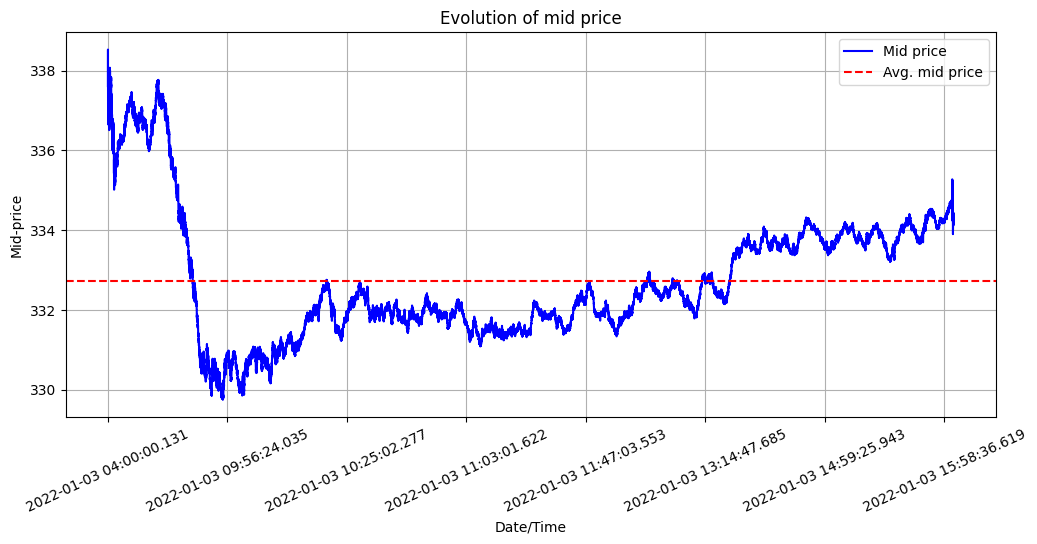

In [72]:
# data={"a": data["ap"], "b": data["bp"], "m": mid_price}
_ = mid_price.plot(color="blue", rot=25, label="Mid price")
_ = plt.grid()
_ = plt.xlabel("Date/Time")
_ = plt.ylabel("Mid-price")
_ = plt.axhline(y = mid_price.mean(), color="red", ls="--", label="Avg. mid price")
_ = plt.legend()
_ = plt.title("Evolution of mid price")